In [1]:
import pandas as pd
from tech_core.feature_pipeline import FeaturesPipeline
from tech_core.losses import StreamingSharpeLoss
from tech_core.nn_builder import SimplePortfolioAllocator, DeepPortfolioAllocator_1
import torch
from tqdm import tqdm
# ??? Should we make different train periods for different models?

In [2]:
path_to_data = '../data/'

split_dates = [
    pd.Timestamp("2025-01-01")
]
split_names = ['train', 'test']

fee = 1.53e-4
padding = 35
batch_size_config = {
    0: 1000,
    # 40: 4000,
    # 80: 10000
}
num_epochs = 200
adam_lr = 1e-1
log_freq = 50

In [3]:
prev_models = []

batch_size = batch_size_config[0]
pipeline = FeaturesPipeline(
    path_to_data,
    padding=padding,
    batch_size=batch_size,
    split_dates=split_dates,
    split_names=split_names
)

cmf_dim = asset_dim = num_assets = None
for common_feats, asset_feats, fut_ret, _, _ in tqdm(pipeline.iterate('train'), desc="Loading features"):
    cmf_dim = common_feats.shape[1]
    asset_dim = asset_feats.shape[2]
    num_assets = asset_feats.shape[1]
    break
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


Loading features: 0it [00:00, ?it/s]


  0%|          | 0/200 [00:00<?, ?it/s]

Changing batch size to 1000 at epoch 0


 24%|██▍       | 49/200 [41:41<2:02:40, 48.75s/it]

Sharpe Ratio for the epoch: 4.2080
Average Weights:



,Weight
Cash,9.249068e-01
BKNG,6.248863e-02
IP,5.057670e-03
GRMN,4.437802e-03
IBM,2.275675e-03
...,...
ALB,7.513364e-11
MCD,7.449415e-11
ZBH,6.363107e-11
PODD,6.167830e-11


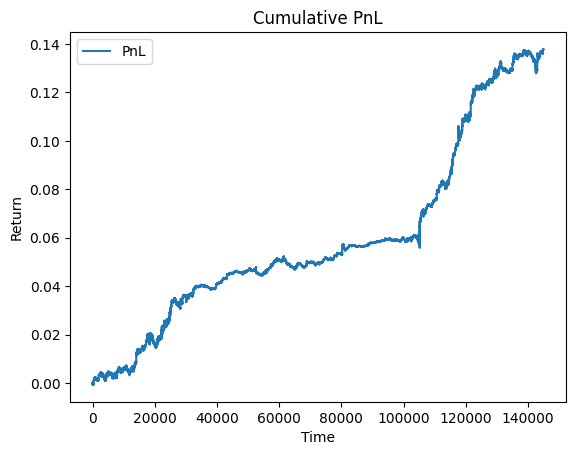

Epoch 50: Loss = -6.537936687469482
Sharpe Ratio for the epoch: 9.2069
Average Weights:



,Weight
Cash,8.798349e-01
BKNG,9.239969e-02
IP,9.280585e-03
GRMN,9.028996e-03
IBM,7.022904e-03
...,...
ALB,1.264593e-10
MCD,1.257532e-10
ZBH,1.075232e-10
PODD,1.036982e-10


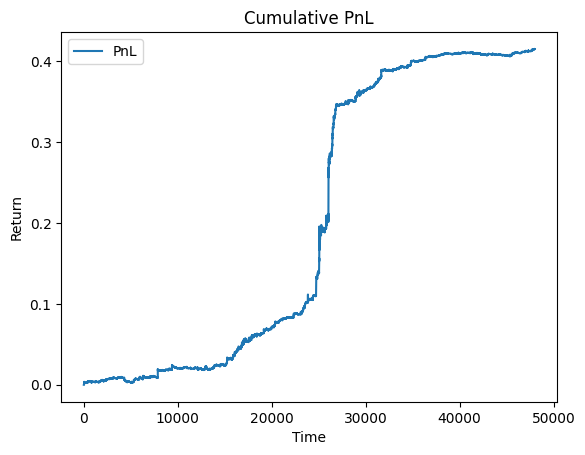

 50%|████▉     | 99/200 [1:22:08<1:21:45, 48.57s/it]

Sharpe Ratio for the epoch: 5.5833
Average Weights:



,Weight
Cash,9.098724e-01
BKNG,4.276639e-02
FICO,2.550705e-02
FFIV,9.969047e-03
PTC,5.529058e-03
...,...
ALB,2.357356e-12
MCD,2.156596e-12
PODD,2.051366e-12
ZBH,1.890391e-12


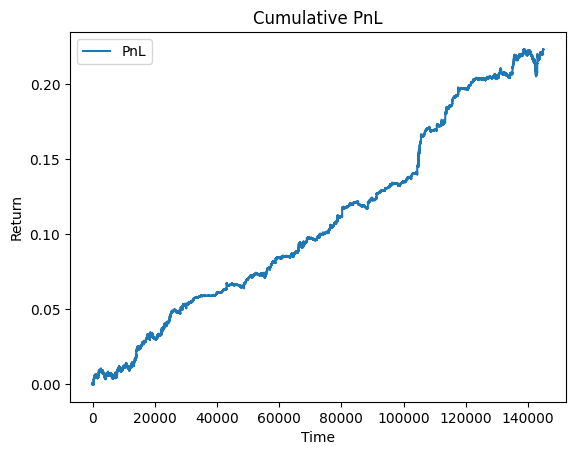

Epoch 100: Loss = -8.791801452636719
Sharpe Ratio for the epoch: 10.6669
Average Weights:



,Weight
Cash,8.048305e-01
BKNG,1.445552e-01
PTC,1.767375e-02
IBM,1.261426e-02
FFIV,1.119001e-02
...,...
ALB,3.287247e-12
MCD,3.015268e-12
PODD,2.857672e-12
ZBH,2.645296e-12


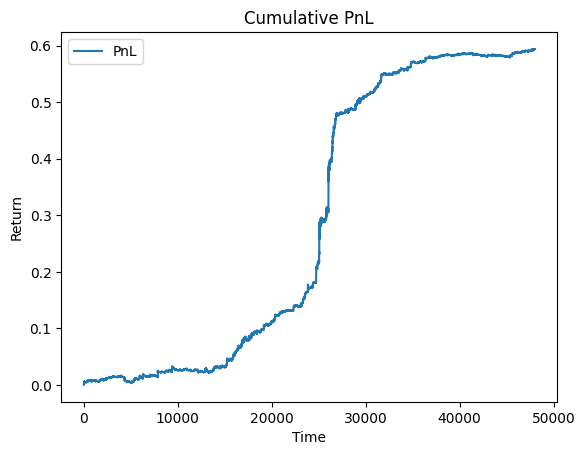

 74%|███████▍  | 149/200 [2:02:44<41:22, 48.68s/it]  

Sharpe Ratio for the epoch: 8.3577
Average Weights:



,Weight
Cash,9.127089e-01
MPWR,2.705318e-02
FICO,2.045480e-02
BKNG,1.833415e-02
MTD,1.461926e-02
...,...
ALB,1.351006e-13
PODD,1.269648e-13
MCD,1.104793e-13
ZBH,1.001955e-13


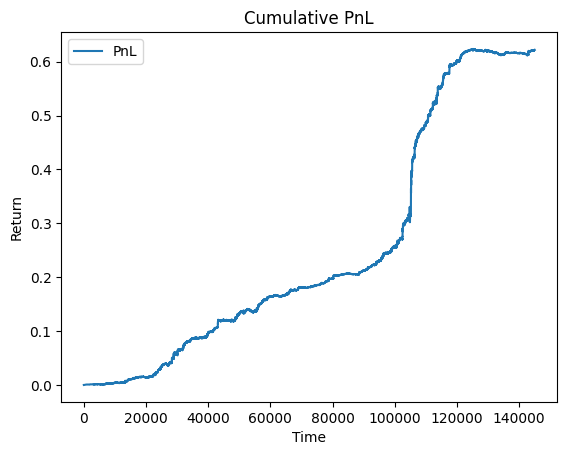

Epoch 150: Loss = -8.79378890991211
Sharpe Ratio for the epoch: 10.8430
Average Weights:



,Weight
Cash,9.258774e-01
BKNG,4.481636e-02
FICO,1.918652e-02
MPWR,3.233256e-03
MTD,2.617395e-03
...,...
ALB,8.217626e-14
PODD,7.720625e-14
MCD,6.737539e-14
ZBH,6.117688e-14


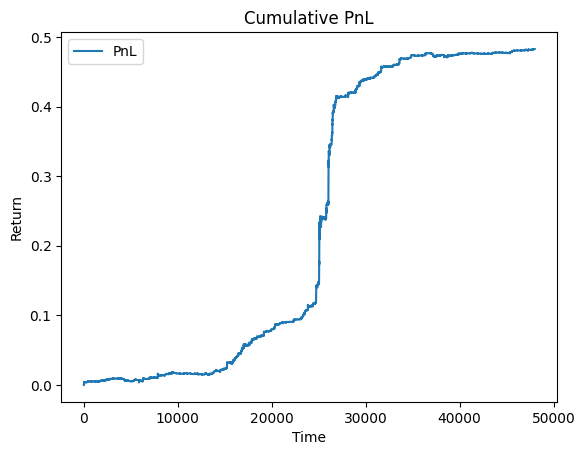

100%|█████████▉| 199/200 [2:43:19<00:48, 48.67s/it]

Sharpe Ratio for the epoch: 10.1483
Average Weights:



,Weight
Cash,8.972913e-01
MPWR,4.314753e-02
FICO,2.553578e-02
BKNG,1.727534e-02
MTD,1.663276e-02
...,...
MO,5.295150e-14
BBY,5.221116e-14
MCD,4.572107e-14
ZBH,4.243487e-14


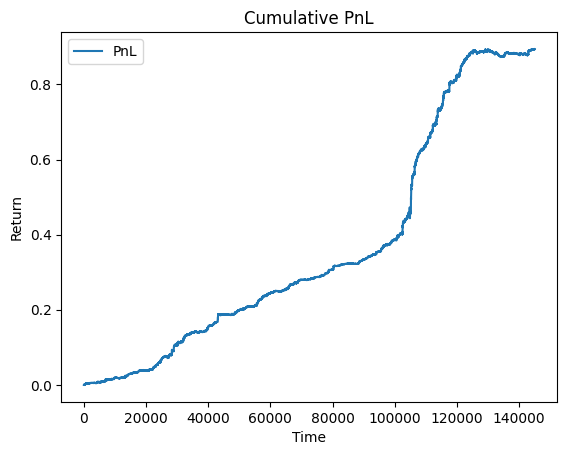

Epoch 200: Loss = -6.369589328765869
Sharpe Ratio for the epoch: 10.0664
Average Weights:



,Weight
Cash,9.031804e-01
FICO,4.348972e-02
BKNG,2.106419e-02
MTD,1.853953e-02
MPWR,1.363934e-02
...,...
MO,3.735005e-14
BBY,3.664422e-14
MCD,3.219063e-14
ZBH,2.990407e-14


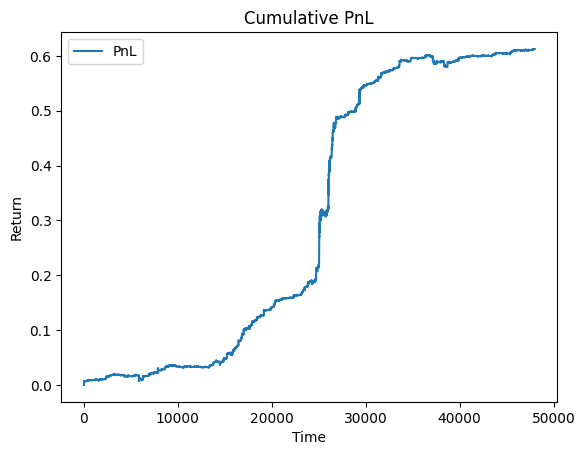

100%|██████████| 200/200 [2:44:08<00:00, 49.24s/it]

Iteration 1 completed.



  0%|          | 0/200 [00:00<?, ?it/s]

Changing batch size to 1000 at epoch 0


 24%|██▍       | 49/200 [40:09<2:03:37, 49.12s/it]

Sharpe Ratio for the epoch: 10.1317
Average Weights:



,Weight
Cash,8.604205e-01
MPWR,3.377126e-02
FICO,1.974819e-02
BKNG,1.165309e-02
IRM,3.551718e-03
...,...
ZBH,6.129475e-10
K,5.818589e-10
MO,5.377941e-10
TGT,5.052583e-10


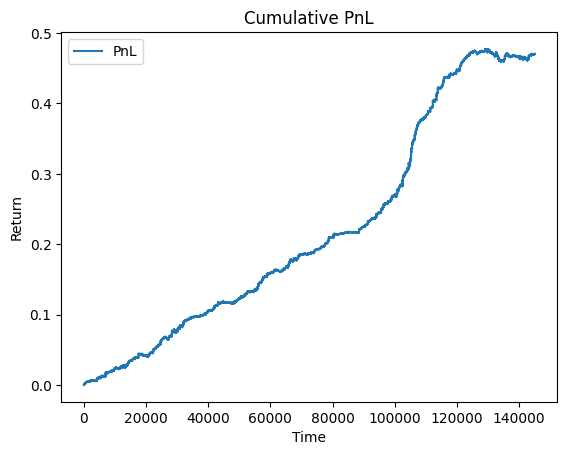

Epoch 50: Loss = -0.517999529838562
Sharpe Ratio for the epoch: 12.0329
Average Weights:



,Weight
Cash,8.380201e-01
FICO,2.492910e-02
MPWR,2.370328e-02
BKNG,1.287182e-02
IRM,3.343758e-03
...,...
ZBH,6.580378e-10
K,6.151518e-10
MO,5.617034e-10
TGT,5.374198e-10


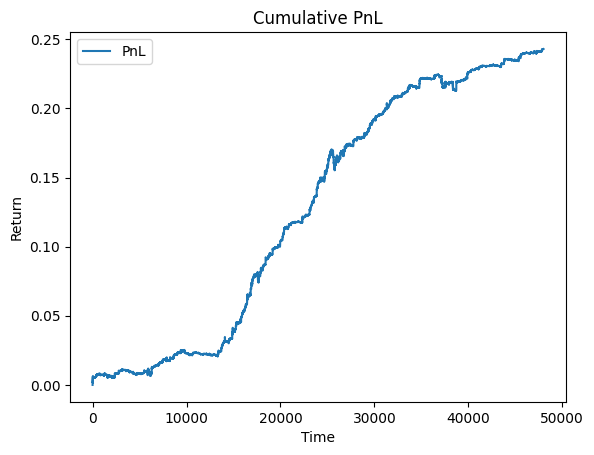

 50%|████▉     | 99/200 [1:20:56<1:22:14, 48.86s/it]

Sharpe Ratio for the epoch: 10.8929
Average Weights:



,Weight
Cash,8.721650e-01
MPWR,2.510178e-02
FICO,1.433819e-02
MTD,1.008788e-02
BKNG,6.615929e-03
...,...
K,1.474960e-11
BSX,1.469590e-11
TGT,1.245759e-11
MCD,1.243064e-11


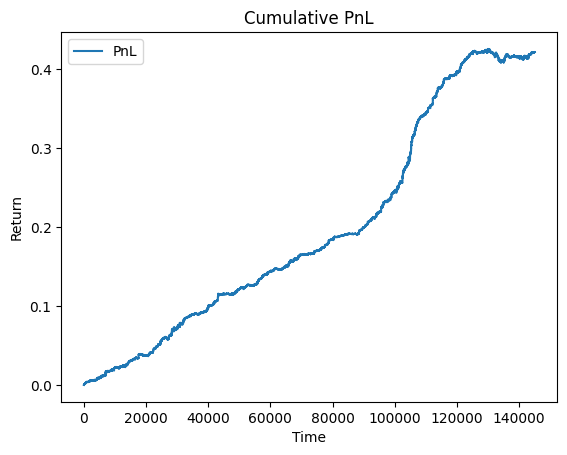

Epoch 100: Loss = -4.855842113494873
Sharpe Ratio for the epoch: 11.9297
Average Weights:



,Weight
Cash,8.463790e-01
MPWR,2.203609e-02
FICO,1.716821e-02
MTD,1.011156e-02
BKNG,6.329497e-03
...,...
ROST,1.878174e-11
YUM,1.866056e-11
MCD,1.618969e-11
TGT,1.605928e-11


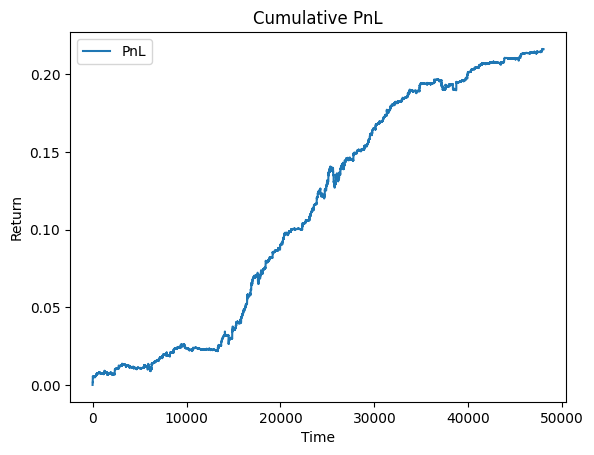

 74%|███████▍  | 149/200 [2:01:55<41:37, 48.97s/it]  

Sharpe Ratio for the epoch: 11.1861
Average Weights:



,Weight
Cash,8.783114e-01
MPWR,2.185452e-02
FICO,1.241521e-02
MTD,1.089169e-02
BKNG,4.349736e-03
...,...
BSX,3.207978e-13
ROST,3.175883e-13
TGT,2.779988e-13
MCD,2.772516e-13


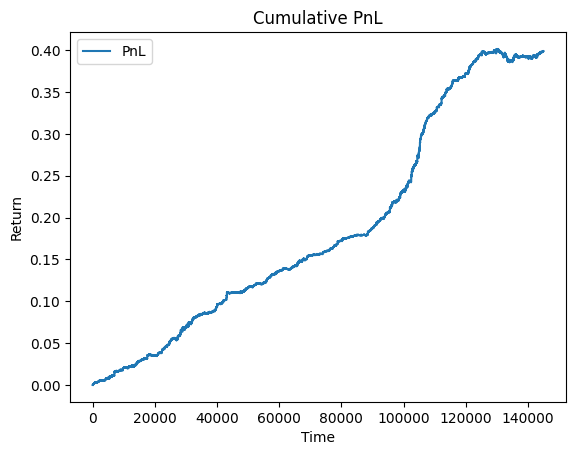

Epoch 150: Loss = -7.506734848022461
Sharpe Ratio for the epoch: 12.0683
Average Weights:



,Weight
Cash,8.531744e-01
MPWR,1.717003e-02
FICO,1.453628e-02
MTD,1.297440e-02
BKNG,3.821918e-03
...,...
YUM,5.108921e-13
ROST,5.019643e-13
MCD,4.645006e-13
TGT,4.599491e-13


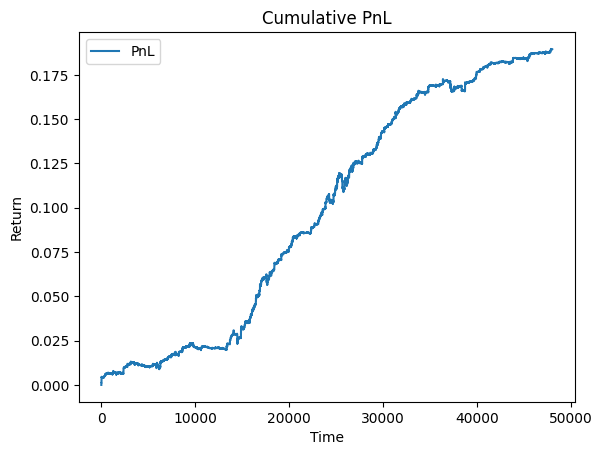

100%|█████████▉| 199/200 [2:42:43<00:49, 49.05s/it]

Sharpe Ratio for the epoch: 11.4166
Average Weights:



,Weight
Cash,8.818884e-01
MPWR,1.994669e-02
FICO,1.146645e-02
MTD,1.072484e-02
BKNG,3.224561e-03
...,...
YUM,2.390953e-14
MCD,2.214226e-14
ROST,2.181127e-14
TGT,2.159188e-14


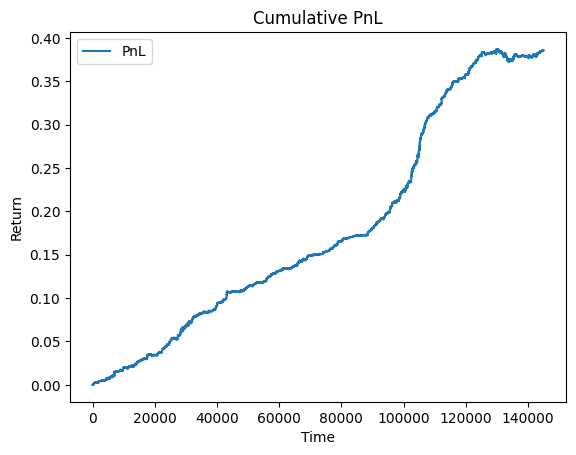

Epoch 200: Loss = -8.982417106628418
Sharpe Ratio for the epoch: 12.2488
Average Weights:



,Weight
Cash,8.582770e-01
MTD,1.399587e-02
MPWR,1.338623e-02
FICO,1.286829e-02
BKNG,2.755258e-03
...,...
MCD,4.514180e-14
FAST,4.504305e-14
TGT,4.354708e-14
ROST,4.215533e-14


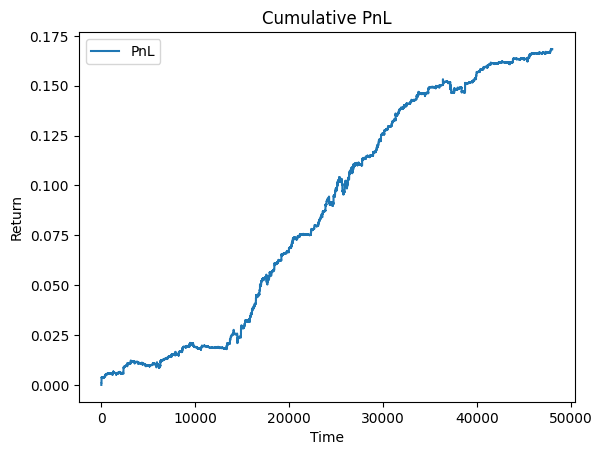

100%|██████████| 200/200 [2:43:32<00:00, 49.06s/it]

Iteration 2 completed.


RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

In [ ]:
from copy import deepcopy

prev_models = []
for i in range(len(prev_models), 10):

    # ad-hoc so far, mb add this to pipeline
    train_cash_left = []
    for common_feats_old, asset_feats, fut_ret, min_prices, market_caps in pipeline.iterate('train'):

        # Перевод в тензоры
        common_feats = torch.tensor(common_feats_old.values, dtype=torch.float32).to(device)       # (T, d_common)
        asset_feats  = torch.tensor(asset_feats,         dtype=torch.float32).to(device)       # (T, n_assets, d_asset)
        fut_ret      = torch.tensor(fut_ret.values,      dtype=torch.float32).to(device)       # (T, n_assets)
        min_prices  = torch.tensor(min_prices.values,   dtype=torch.float32).to(device)       # (T, n_assets)
        market_caps = torch.tensor(market_caps.values,  dtype=torch.float32).to(device)       # (T, n_assets)

        if len(common_feats) != batch_size:
            continue

        cash_left = torch.ones((common_feats.shape[0], 1), dtype=torch.float32, device=device)  # (T, 1)
        for prev_model in prev_models:
            common_feats_tmp = common_feats_old.copy()
            common_feats_tmp['cash_left'] = cash_left.detach().numpy()
            common_feats_tmp = torch.tensor(common_feats_tmp.values, dtype=torch.float32).to(device)
            cash_left *= prev_model(common_feats_tmp, asset_feats)[:, -1:]

        train_cash_left.append(cash_left.detach())
    
    test_cash_left = []
    for common_feats_old, asset_feats, fut_ret, min_prices, market_caps in pipeline.iterate('test'):

        common_feats = torch.tensor(common_feats_old.values, dtype=torch.float32).to(device)
        asset_feats  = torch.tensor(asset_feats,         dtype=torch.float32).to(device)
        fut_ret      = torch.tensor(fut_ret.values,      dtype=torch.float32).to(device)
        min_prices  = torch.tensor(min_prices.values,   dtype=torch.float32).to(device)
        market_caps = torch.tensor(market_caps.values,  dtype=torch.float32).to(device)
        
        if len(common_feats) != batch_size:
            continue

        cash_left = torch.ones((common_feats.shape[0], 1), dtype=torch.float32, device=device)  # (T, 1)
        for prev_model in prev_models:
            common_feats_tmp = common_feats_old.copy()
            common_feats_tmp['cash_left'] = cash_left.detach().numpy()
            common_feats_tmp = torch.tensor(common_feats_tmp.values, dtype=torch.float32).to(device)
            cash_left *= prev_model(common_feats_tmp, asset_feats)[:, -1:]
        test_cash_left.append(cash_left.detach())

    model = SimplePortfolioAllocator(
        cmf_dim=cmf_dim + 1,
        num_assets=num_assets,
    ).to(device)

    optimizer = torch.optim.Adam(model.parameters(), lr=adam_lr)

    loss_fn = StreamingSharpeLoss(
        fee=fee,
        asset_names=pipeline.reader.asset_names + ['Cash'],  # Добавляем Cash в список активов
    )
    for epoch in tqdm(range(num_epochs)):
        if epoch in batch_size_config:
            print(f"Changing batch size to {batch_size_config[epoch]} at epoch {epoch}")
            batch_size = batch_size_config[epoch]
            pipeline = FeaturesPipeline(
                path_to_data,
                padding=padding,
                batch_size=batch_size,
                split_dates=split_dates,
                split_names=split_names
            )

        loss_fn.reset()
        pipeline.reset()
        for (common_feats, asset_feats, fut_ret, min_prices, market_caps), cash_left in zip(pipeline.iterate('train'), train_cash_left):

            common_feats['cash_left'] = cash_left.squeeze()  # Добавляем cash_left в общие признаки

            # Перевод в тензоры
            common_feats = torch.tensor(common_feats.values, dtype=torch.float32).to(device)       # (T, d_common)
            asset_feats  = torch.tensor(asset_feats,         dtype=torch.float32).to(device)       # (T, n_assets, d_asset)
            fut_ret      = torch.tensor(fut_ret.values,      dtype=torch.float32).to(device)       # (T, n_assets)
            min_prices  = torch.tensor(min_prices.values,   dtype=torch.float32).to(device)       # (T, n_assets)
            market_caps = torch.tensor(market_caps.values,  dtype=torch.float32).to(device)       # (T, n_assets)

            if len(common_feats) != batch_size:
                continue

            optimizer.zero_grad()

            # Вычисляем веса
            weights = model(common_feats, asset_feats)

            # Обновляем метрику
            loss_value = loss_fn.forward(
                weights=weights,
                returns=fut_ret,
                prev_model_cash=cash_left,
                min_prices=min_prices,
                market_caps=market_caps
            )
            loss_value.backward()

            optimizer.step()

        if (epoch + 1) % log_freq == 0:
            _, weights_df = loss_fn.plot_whole_epoch_loss()
            weights_df.to_csv(f'weights_iteration_{i}_epoch_{epoch + 1}.csv')
            torch.save(model.state_dict(), f'model_iteration_{i}_epoch_{epoch + 1}.pth')
            print(f"Epoch {epoch + 1}: Loss = {loss_value.item()}")
        loss_fn.reset()  # Сбрасываем метрику для следующей эпохи

        for (common_feats, asset_feats, fut_ret, min_prices, market_caps), cash_left in zip(pipeline.iterate('test'), test_cash_left):

            common_feats['cash_left'] = cash_left.squeeze()  # Добавляем cash_left в общие признаки

            common_feats = torch.tensor(common_feats.values, dtype=torch.float32).to(device)
            asset_feats  = torch.tensor(asset_feats,         dtype=torch.float32).to(device)
            fut_ret      = torch.tensor(fut_ret.values,      dtype=torch.float32).to(device)
            min_prices  = torch.tensor(min_prices.values,   dtype=torch.float32).to(device)
            market_caps = torch.tensor(market_caps.values,  dtype=torch.float32).to(device)

            if len(common_feats) !=  batch_size:
                continue

            weights = model(common_feats, asset_feats)
            loss_fn.forward(weights=weights, returns=fut_ret, prev_model_cash=cash_left, min_prices=min_prices, market_caps=market_caps)

        if (epoch + 1) % log_freq == 0:
            loss_fn.plot_whole_epoch_loss()
        loss_fn.reset()

    prev_models.append(deepcopy(model))
    print(f"Iteration {i + 1} completed.")